# VOLTMETRO

OBIETTIVO: stimare la resistenza interna del voltmetro

PROCEDIMENTO: usando resistenze dell'ordine dei MΩ misuriamo la corrente di una resistenza equivalente data da $R_{eq} = \frac{R_v R}{Rv + R}$

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'voltmetro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(MOHM)']) * (10**6) #megaOHM # - 0.2 ohm non necessario
sigmaRpercent = 0.01 # 1%
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) * (10**-6) #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

In [2]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

### stima e propagazione dell'errore

In [6]:
Rv = (I/V - 1/R)**-1
sigmaRv = (np.abs(I/V - 1/R)**-1) * np.sqrt((sigmaI/V)**2 + (I*sigmaV/(V**2)**2) + (sigmaR/(R**2))**2)

# print(Rv,sigmaRv)

N = len(Rv)
w = 1/(sigmaRv**2)
avg_Rv = np.average(Rv,weights=w)
print(np.sqrt(1/np.sum(w)))
sigma_avg_Rv = np.sqrt(1/np.sum(w))
# print(sigma_avg_Rv)

25.759976321694708


In [7]:
print('Rv: ',final_val(avg_Rv,sigma_avg_Rv,decimals=5,exp=6,udm='Ω'))

Rv:  (10.84591 ± 3e-05)e6 Ω


# RAPPRESENTAZIONE GRAFICA INPUT

In [8]:
R = np.array(fr['R(MOHM)']) #megaOHM # - 0.2 ohm non necessario
sigmaRpercent = 0.01
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

[ 0.99999991  1.49999979  1.99999963  2.49999942  2.99999917  3.49999887
  3.99999852  4.49999813  4.99999769  5.49999721  5.99999668  6.4999961
  6.99999548  7.49999481  7.9999941   8.49999334  8.99999253  9.49999168
  9.99999078 10.49998983]
[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5]


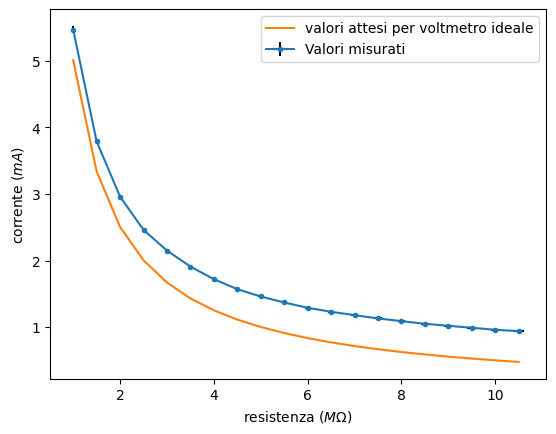

In [9]:
plt.errorbar(R,I,xerr=sigmaR,yerr=sigmaI,label='Valori misurati',marker='.',ecolor='black')
#r = np.linspace(min(R),max(R),100)
Req = avg_Rv*R / (avg_Rv + R)
print(Req)
print(R)

Iatt = V/Req
plt.plot(Req,Iatt,label='valori attesi per voltmetro ideale')
plt.ylabel('corrente ($mA$)')
plt.xlabel('resistenza ($M\Omega$)')
plt.legend()
plt.show()

# CORREZIONE GRAFICO


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'voltmetro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(MOHM)']) * (10**6) #megaOHM # - 0.2 ohm non necessario
sigmaRpercent = 0.01 # 1%
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) * (10**-6) #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

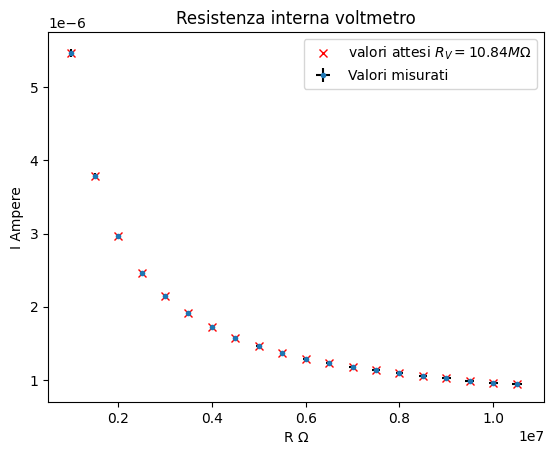

In [28]:
req = 1/(1/Rv + 1/R)
# sigmaReq = np.sqrt((sigmaR**2)/(R**4) + (sigmaRv**2)/(Rv**4))
i = V/req
# sigmai = np.sqrt((sigmaV/V)**2 + (sigmaReq/req)**2)
plt.plot(R,i,label='valori attesi $R_V = 10.84M\Omega$',color='red',marker='x',linestyle='None')
plt.errorbar(R,I,xerr=sigmaR,yerr=sigmaI,label='Valori misurati',marker='.',ecolor='black',linestyle='None')
plt.title('Resistenza interna voltmetro')
plt.xlabel('R $\Omega$')
plt.ylabel('I Ampere')
plt.legend()
plt.show()